<div style="text-align: center;">
    <h1>PROJECT P8
    <h1><b>Patient Preferences Studies Categorization System</h1>
    <p><b>Gillio Francesco Giuseppe</b></p>
    <p>Seminario Yrigo̱yen César Augusto</b></p>
    <h3>Applied Data Science Project</h3>
    <p><i>Polytechnic University of Turin - Italy</i></p>
</div>

In [1]:
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
main = '/content/drive/MyDrive/embedding-models'
if not os.path.exists(main):
    os.makedirs(main)

In [4]:
branch = os.path.join('/content/drive/MyDrive/embedding-models', 'google')
if not os.path.exists(branch):
    os.makedirs(branch)

branch = os.path.join('/content/drive/MyDrive/embedding-models', 'sentence-transformers')
if not os.path.exists(branch):
    os.makedirs(branch)

# **data-exploration**

In [5]:
import numpy as np
import pandas as pd

**Data Collection**
* Dataset: output of a **Pubmed Search String** on **Patient Preferences Studies**
* URL: https://raw.githubusercontent.com/adsp-polito/2024-P8-PPS/refs/heads/main/input_data/articles_2023.csv

In [6]:
raw = 'https://raw.githubusercontent.com/adsp-polito/2024-P8-PPS/refs/heads/main/input_data/articles_2023.csv'
data = pd.read_csv(raw)
data.head()

,Title,Authors,Abstract,Published Year,Published Month,Journal,Volume,Issue,Pages,Accession Number,DOI,Ref,Covidence #,Study,Notes,Tags,Label
0,Preferences for disease-related information an...,de Hosson M; De Groote K; Wynendaele H; Mosque...,PURPOSE: The transition towards adult-focused ...,2023,Sep,Eur J Pediatr,182,9,3917-3927,NaN,10.1007/s00431-023-05020-1,37351648,#930,deHosson 2023,NaN,NaN,0
1,Advance Care Planning in South Korea.,Kim YJ; Kim SH,South Korea is an Asian country with a very lo...,2023,Aug,Z Evid Fortbild Qual Gesundhwes,180,NaN,68-73,NaN,10.1016/j.zefq.2023.04.014,37353427,#1010,Kim 2023,NaN,NaN,0
2,Stakeholders' preferences for the design and d...,Vo LK; Allen MJ; Cunich M; Thillainadesan J; M...,This systematic review aimed to synthesise evi...,2024,Jan,Soc Sci Med,340,NaN,116459,NaN,10.1016/j.socscimed.2023.116459,38048738,#513,Vo 2024,NaN,NaN,1
3,Discrete Choice Experiments in Health State Va...,Wang H; Rowen DL; Brazier JE; Jiang L,BACKGROUND: Discrete choice experiments (DCEs)...,2023,May,Appl Health Econ Health Policy,21,3,405-418,NaN,10.1007/s40258-023-00794-9,36997744,#1276,Wang 2023,NaN,NaN,1
4,Improving methods of clinical practice guideli...,Djulbegovic B; Hozo I; Cuker A; Guyatt G,BACKGROUND: Current methods for developing cli...,2023,Dec,J Eval Clin Pract,NaN,NaN,NaN,NaN,10.1111/jep.13953,38073027,#573,Djulbegovic 2023,NaN,NaN,0


**Data Exploration**

1. Extract relevant features from the dataset: **Title, Abstract & Label**

In [7]:
data = data[['Title', 'Abstract', 'Label']]
data.head()

,Title,Abstract,Label
0,Preferences for disease-related information an...,PURPOSE: The transition towards adult-focused ...,0
1,Advance Care Planning in South Korea.,South Korea is an Asian country with a very lo...,0
2,Stakeholders' preferences for the design and d...,This systematic review aimed to synthesise evi...,1
3,Discrete Choice Experiments in Health State Va...,BACKGROUND: Discrete choice experiments (DCEs)...,1
4,Improving methods of clinical practice guideli...,BACKGROUND: Current methods for developing cli...,0


2. Assess the **Title Average Length** and the **Abstract Average Lenght** (Word Count)

In [8]:
data['title-length'] = data['Title'].astype(str).apply(lambda x: len(x.split()))
data['abstract-length'] = data['Abstract'].astype(str).apply(lambda x: len(x.split()))

print(f"Title Average Length (Word Count): {data['title-length'].mean():.2f} words")
print(f"Abstract Average Lenght (Word Count): {data['abstract-length'].mean():.2f} words")

Title Average Length (Word Count): 15.16 words
Abstract Average Lenght (Word Count): 256.62 words


3. Detect **NaN** values in the dataset

In [9]:
print(f"NaN (Count)")
print(f"Titles: {data['Title'].isna().sum()}")
print(f"Abstracts: {data['Abstract'].isna().sum()}")

NaN (Count)
Titles: 0
Abstracts: 44


In [10]:
# data.dropna()

data['Title'] = data['Title'].fillna('')
data['Abstract'] = data['Abstract'].fillna('')

# reset
data.reset_index(drop=True, inplace=True)

data = data[['Title', 'Abstract', 'Label', 'title-length', 'abstract-length']]

# check
data.head()

,Title,Abstract,Label,title-length,abstract-length
0,Preferences for disease-related information an...,PURPOSE: The transition towards adult-focused ...,0,18,346
1,Advance Care Planning in South Korea.,South Korea is an Asian country with a very lo...,0,6,199
2,Stakeholders' preferences for the design and d...,This systematic review aimed to synthesise evi...,1,18,300
3,Discrete Choice Experiments in Health State Va...,BACKGROUND: Discrete choice experiments (DCEs)...,1,15,357
4,Improving methods of clinical practice guideli...,BACKGROUND: Current methods for developing cli...,0,21,225


4. Detect **Outliers** in the dataset (rows with **Abstract Length** out of bound)

In [11]:
threshold = 1.5 * data['abstract-length'].mean()

# deviation
data['deviation'] = (data['abstract-length'] - data['abstract-length'].mean()) / data['abstract-length'].mean()

outliers = data[(data['abstract-length'] > threshold)]

print(f"Outliers (Count): {len(outliers)}")

Outliers (Count): 77


In [12]:
outliers.head()

,Title,Abstract,Label,title-length,abstract-length,deviation
31,Prospective Six-Month Analysis of Multiarea Bu...,INTRODUCTION: DeRidder burst spinal cord stimu...,0,18,450,0.753545
52,Obesity Management in Adults: A Review.,IMPORTANCE: Obesity affects approximately 42% ...,0,6,522,1.034112
59,A Smartphone-Gamified Virtual Reality Exposure...,"BACKGROUND: To the best of our knowledge, no s...",0,15,414,0.613261
93,Understanding patient cost-sharing thresholds ...,BACKGROUND: The process used to prefer certain...,1,13,388,0.511945
99,Which body functions and activities matter for...,"BACKGROUND: Stroke is a common, serious, and d...",1,27,395,0.539223


5. Assess the **Label Distribution** of the dataset

In [13]:
counts = data['Label'].value_counts()
print("Label Distribution:")
print(counts)

Label Distribution:
Label
0    986
1    229
Name: count, dtype: int64


# **data-visualization**

In [14]:
import numpy as np
import pandas as pd

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

unito = "#EE1A39"
polito = "#002A5C"

1. **Title Length Distribution**

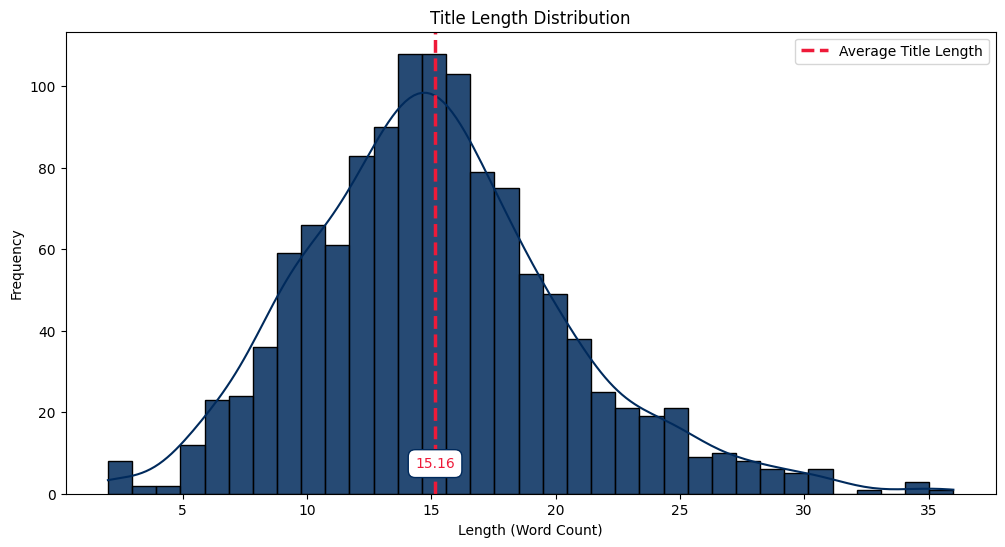

In [16]:
plt.figure(figsize=(12, 6))
sns.histplot(data['title-length'],
             kde=True,
             color=polito,
             bins=35,
             alpha=0.85)

plt.axvline(data['title-length'].mean(),
            color=unito,
            linestyle='dashed',
            linewidth=2.5,
            label='Average Title Length')

mean = data['title-length'].mean()
plt.text(mean,
         plt.gca().get_ylim()[1] * 0.05,
         f'{mean:.2f}',
         color=unito,
         fontsize=10,
         ha='center',
         va='bottom',
         bbox=dict(facecolor='white',
                   edgecolor=polito,
                   boxstyle='round,pad=0.5'))

plt.title('Title Length Distribution')
plt.xlabel('Length (Word Count)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

2. **Abstract Length Distribution**

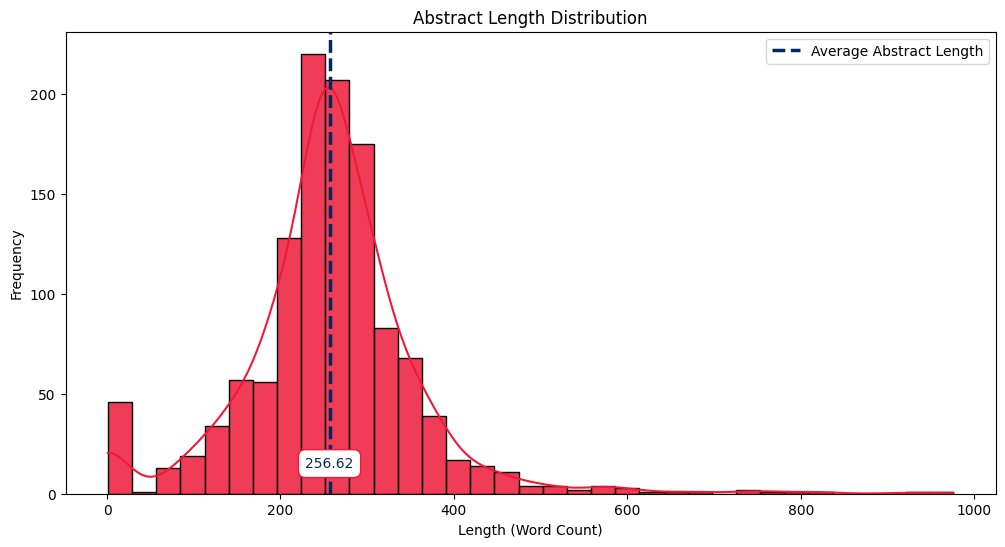

In [17]:
plt.figure(figsize=(12, 6))
sns.histplot(data['abstract-length'],
             kde=True,
             color=unito,
             bins=35,
             alpha=0.85)

mean = data['abstract-length'].mean()
plt.axvline(mean,
            color=polito,
            linestyle='dashed',
            linewidth=2.5,
            label='Average Abstract Length')

plt.text(mean,
         plt.gca().get_ylim()[1] * 0.05,
         f'{mean:.2f}',
         color=polito,
         fontsize=10,
         ha='center',
         va='bottom',
         bbox=dict(facecolor='white',
                   edgecolor=unito,
                   boxstyle='round,pad=0.5'))

plt.title('Abstract Length Distribution')
plt.xlabel('Length (Word Count)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

3. **Boxplot for Title Length**

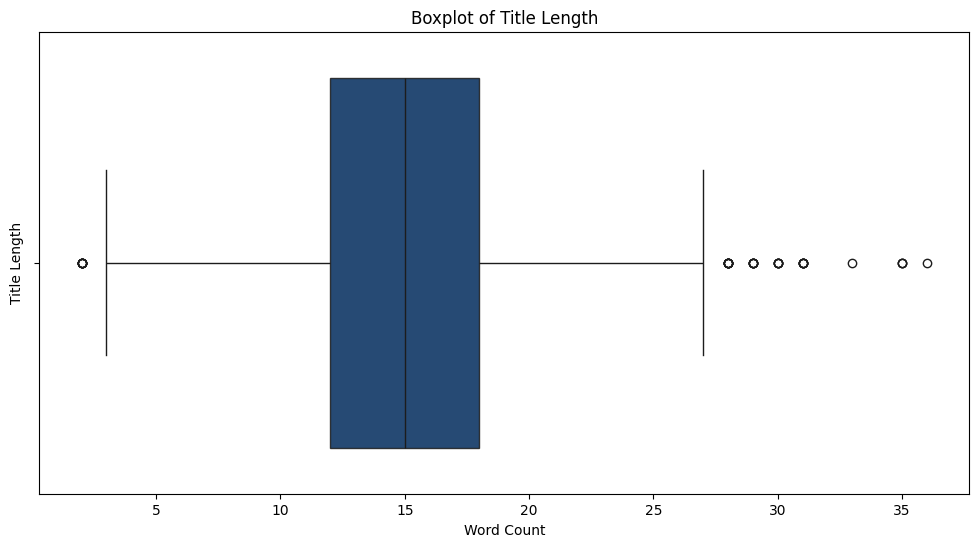

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=data['title-length'].values,
    orient="h",
    color=polito,
    boxprops=dict(facecolor=polito,
                  alpha=0.85)
)
plt.title("Boxplot of Title Length")
plt.xlabel("Word Count")
plt.ylabel("Title Length")
plt.show()

4. **Boxplot for Abstract Length**

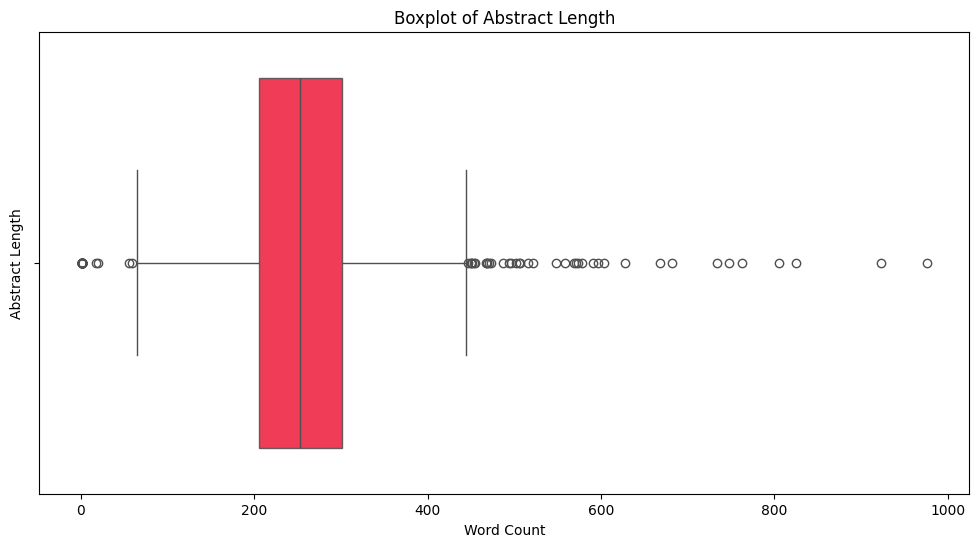

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=data['abstract-length'].values,
    orient="h",
    color=unito,
    boxprops=dict(facecolor=unito,
                  alpha=0.85)
)
plt.title("Boxplot of Abstract Length")
plt.xlabel("Word Count")
plt.ylabel("Abstract Length")
plt.show()

5. **Label Distribution**

<ipython-input-20-b0a9ff89c45e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


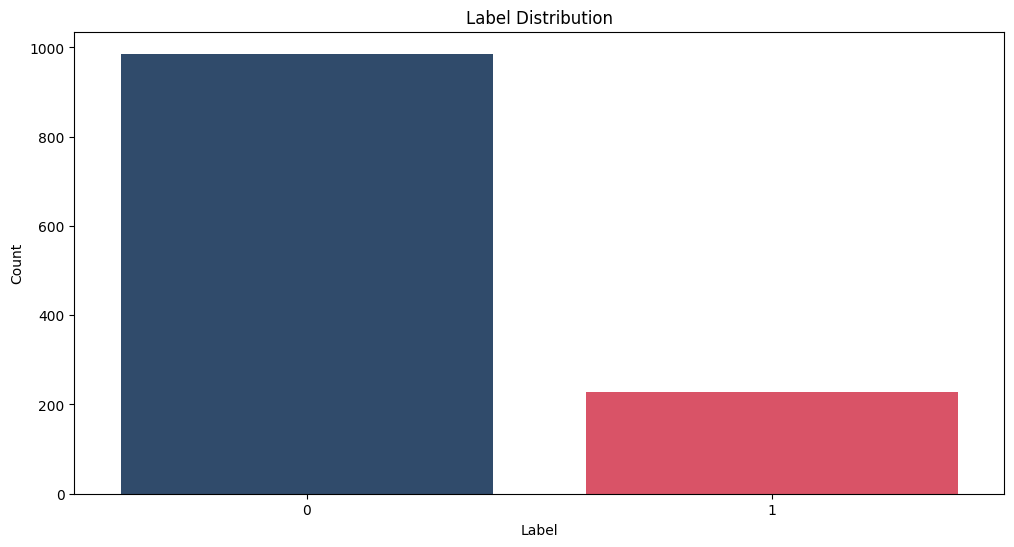

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x=counts.index,
    y=counts.values,
    palette=[polito, unito],
    alpha=0.85
)
plt.title("Label Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

6. **Scatter Plot for Outliers**

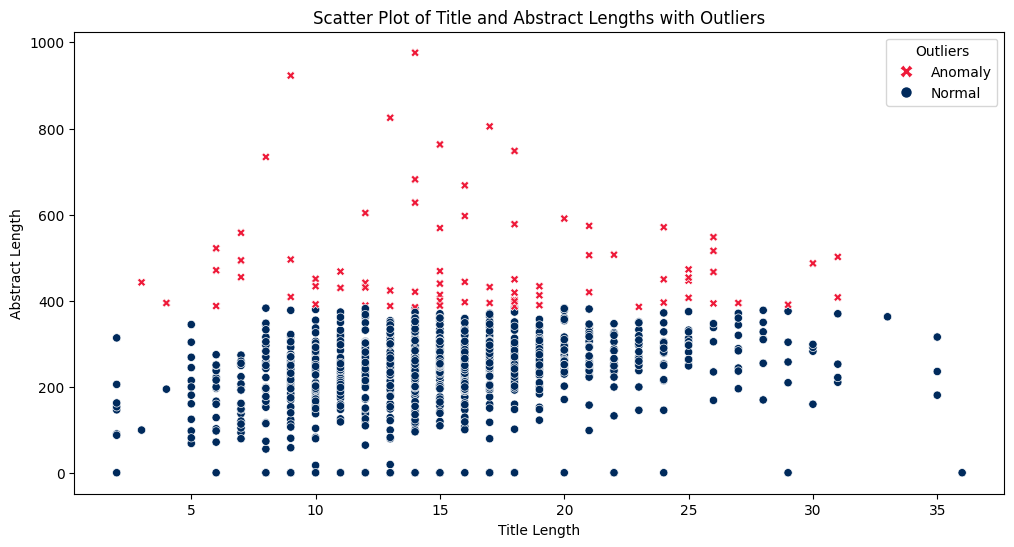

In [21]:
import matplotlib.lines as mlines

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=data,
    x='title-length',
    y='abstract-length',
    hue=(data.index.isin(outliers.index)),
    palette={True: unito,
             False: polito},
    style=(data.index.isin(outliers.index)),
    markers={True: 'X',
             False: 'o'},
    legend='full',
)

legend_handles = [
    mlines.Line2D([], [],
                  marker='X',
                  color='w',
                  markerfacecolor=unito,
                  markersize=10,
                  label="Anomaly"),
    mlines.Line2D([], [],
                  marker='o',
                  color='w',
                  markerfacecolor=polito,
                  markersize=8.5,
                  label="Normal")
]

plt.title("Scatter Plot of Title and Abstract Lengths with Outliers")
plt.xlabel("Title Length")
plt.ylabel("Abstract Length")

plt.legend(handles=legend_handles,
           title="Outliers")

plt.show()

# **data-preprocessing**

In [22]:
import numpy as np
import pandas as pd

**Data Collection**
* Dataset: output of a **Pubmed Search String** on **Patient Preferences Studies**
* URL: https://raw.githubusercontent.com/adsp-polito/2024-P8-PPS/refs/heads/main/input_data/articles_2023.csv

In [23]:
raw = 'https://raw.githubusercontent.com/adsp-polito/2024-P8-PPS/refs/heads/main/input_data/articles_2023.csv'
data = pd.read_csv(raw)

In [24]:
data = data[['Title', 'Abstract', 'Label']]
data.head()

,Title,Abstract,Label
0,Preferences for disease-related information an...,PURPOSE: The transition towards adult-focused ...,0
1,Advance Care Planning in South Korea.,South Korea is an Asian country with a very lo...,0
2,Stakeholders' preferences for the design and d...,This systematic review aimed to synthesise evi...,1
3,Discrete Choice Experiments in Health State Va...,BACKGROUND: Discrete choice experiments (DCEs)...,1
4,Improving methods of clinical practice guideli...,BACKGROUND: Current methods for developing cli...,0


* Filter out **NaN** values

In [25]:
data = data.fillna("")

* Embedding Function

In [26]:
import torch
from sentence_transformers import SentenceTransformer

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [27]:
def encode(title, abstract, model, tokenizer, device, mask, case):
    """
    encode title and abstract via pre-trained input model

    args:
        title (str): document title
        abstract (str): document abstract
        model: pre-trained model
        device: device ('cuda' or 'cpu')
        case (int): title + abstract case (1-5)
        mask (bool):
            True: outputs.pooler_output
            False: outputs.last_hidden_state[:, 0, :]

    returns:
        numpy.ndarray: title + abstract embedding
    """

    def base(sentence, model, tokenizer, device, mask):
        """
        encode a sentence via pre-trained input bert-base model

        args:
            sentence (str): sentence to encode
            model: pre-trained bert-base model
            tokenizer: bert tokenizer
            device: device ('cuda' or 'cpu')
            mask (bool):
                True: outputs.pooler_output
                False: outputs.last_hidden_state[:, 0, :]

        returns:
            numpy.ndarray: sentence embedding ([CLS] token)
        """
        # tokenize the input sentence
        inputs = tokenizer(
            sentence,
            return_tensors="pt",
            truncation=True,  # truncates sentences longer than 512 tokens
            padding=True,  # pads sentences to the same length in batch processing
            max_length=512
        )

        # inputs to device (GPU or CPU)
        inputs = {key: value.to(device) for key, value in inputs.items()}

        # model to device
        model = model.to(device)

        # pass the input through the model
        with torch.no_grad():
            outputs = model(**inputs, output_attentions=True)

        if mask:
            # post-processed version of the [CLS] token after the pooling layer (tanh activation)
            embedding = outputs.pooler_output  # shape: (batch size, hidden size)
        else:
            # raw version of the [CLS] token from the last hidden layer
            embedding = outputs.last_hidden_state[:, 0, :]  # shape: (batch size, hidden size)

        return embedding.squeeze(0).cpu().numpy()  # move to CPU and convert to numpy

    # case 1: concatenate the title and abstract, and return a single embedding
    if case == 1:
        text = title + ". " + abstract
        if not isinstance(model, SentenceTransformer):
            return base(text, model, tokenizer, device, mask)
        else:
            return model.encode([text], convert_to_numpy=True)[0]

    # case 2: sum the embeddings of the title and abstract
    elif case == 2:
        if not isinstance(model, SentenceTransformer):
            title = base(title, model, tokenizer, device, mask)  # title embedding
            abstract = base(abstract, model, tokenizer, device, mask)  # abstract embedding
        else:
            title = model.encode([title], convert_to_numpy=True)[0]  # title embedding
            abstract = model.encode([abstract], convert_to_numpy=True)[0]  # abstract embedding
        return title + abstract

    # case 3: concatenate the embeddings of the title and abstract
    elif case == 3:
        if not isinstance(model, SentenceTransformer):
            title = base(title, model, tokenizer, device, mask)  # title embedding
            abstract = base(abstract, model, tokenizer, device, mask)  # abstract embedding
        else:
            title = model.encode([title], convert_to_numpy=True)[0]  # title embedding
            abstract = model.encode([abstract], convert_to_numpy=True)[0]  # abstract embedding
        return np.concatenate((title, abstract))

    # case 4: average the embeddings of the title and abstract
    elif case == 4:
        if not isinstance(model, SentenceTransformer):
            title = base(title, model, tokenizer, device, mask)  # title embedding
            abstract = base(abstract, model, tokenizer, device, mask)  # abstract embedding
        else:
            title = model.encode([title], convert_to_numpy=True)[0]  # title embedding
            abstract = model.encode([abstract], convert_to_numpy=True)[0]  # abstract embedding
        return 0.5 * title + 0.5 * abstract

    # case 5: weighted average of the embeddings of the title and abstract (40% title, 60% abstract)
    elif case == 5:
        if not isinstance(model, SentenceTransformer):
            title = base(title, model, tokenizer, device, mask)  # title embedding
            abstract = base(abstract, model, tokenizer, device, mask)  # abstract embedding
        else:
            title = model.encode([title], convert_to_numpy=True)[0]  # title embedding
            abstract = model.encode([abstract], convert_to_numpy=True)[0]  # abstract embedding
        return 0.4 * title + 0.6 * abstract

In [28]:
cases = {
    1: "-string-concatenation",
    2: "-vector-sum",
    3: "-vector-concatenation",
    4: "-vector-average",
    5: "-vector-weighted-average"
}

* Search **NaN** values on the Web

In [29]:
#TODO

# **google/bert-base-uncased**
<img src="https://cdn-thumbnails.huggingface.co/social-thumbnails/models/google-bert/bert-base-uncased.png" width="500">

In [30]:
import numpy as np
import pandas as pd

In [31]:
raw = 'https://raw.githubusercontent.com/adsp-polito/2024-P8-PPS/refs/heads/main/input_data/articles_2023.csv'
data = pd.read_csv(raw)

In [32]:
data = data[['Title', 'Abstract', 'Label']].fillna("")

In [33]:
import torch
from transformers import BertTokenizer, BertModel

In [34]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [35]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

**google/bert-base-uncased-mask**
* `mask = True`





In [36]:
import time

In [37]:
for key, value in cases.items():
    start = time.time()
    data['bert-base-uncased-mask' + value] = data.apply(
        lambda x: encode(x['Title'],
                         x['Abstract'],
                         model,
                         tokenizer,
                         device,
                         mask = True,
                         case = key),
        axis=1
    )
    end = time.time()
    total = end - start
    print(f"{'bert-base-uncased-mask' + value}: {total / 60:.2f} minutes")

BertSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


bert-base-uncased-mask-string-concatenation: 0.71 minutes
bert-base-uncased-mask-vector-sum: 0.91 minutes
bert-base-uncased-mask-vector-concatenation: 0.90 minutes
bert-base-uncased-mask-vector-average: 0.90 minutes
bert-base-uncased-mask-vector-weighted-average: 0.89 minutes


**google/bert-base-uncased-raw**
* `mask = False`


In [38]:
import time

In [39]:
for key, value in cases.items():
    start = time.time()
    data['bert-base-uncased-raw' + value] = data.apply(
        lambda x: encode(x['Title'],
                         x['Abstract'],
                         model,
                         tokenizer,
                         device,
                         mask = False,
                         case = key),
        axis=1
    )
    end = time.time()
    total = end - start
    print(f"{'bert-base-uncased-raw' + value}: {total / 60:.2f} minutes")

bert-base-uncased-raw-string-concatenation: 0.69 minutes
bert-base-uncased-raw-vector-sum: 0.90 minutes
bert-base-uncased-raw-vector-concatenation: 0.90 minutes
bert-base-uncased-raw-vector-average: 0.90 minutes
bert-base-uncased-raw-vector-weighted-average: 0.90 minutes


In [40]:
data.head()

,Title,Abstract,Label,bert-base-uncased-mask-string-concatenation,bert-base-uncased-mask-vector-sum,bert-base-uncased-mask-vector-concatenation,bert-base-uncased-mask-vector-average,bert-base-uncased-mask-vector-weighted-average,bert-base-uncased-raw-string-concatenation,bert-base-uncased-raw-vector-sum,bert-base-uncased-raw-vector-concatenation,bert-base-uncased-raw-vector-average,bert-base-uncased-raw-vector-weighted-average
0,Preferences for disease-related information an...,PURPOSE: The transition towards adult-focused ...,0,"[-0.30550706, -0.609324, -0.9959231, 0.161755,...","[-1.3498132, -1.216946, -1.9569681, 1.1128709,...","[-0.8132925, -0.49836656, -0.95858055, 0.68902...","[-0.6749066, -0.608473, -0.97848403, 0.5564354...","[-0.64722943, -0.6304943, -0.9824648, 0.529918...","[-0.20058781, -0.5175796, -0.46154448, 0.26297...","[-1.0787419, -0.5863358, -1.2244623, 0.1675379...","[-0.62176394, -0.014041641, -0.77576053, 0.032...","[-0.53937095, -0.2931679, -0.61223114, 0.08376...","[-0.5228924, -0.34899315, -0.57952523, 0.09412..."
1,Advance Care Planning in South Korea.,South Korea is an Asian country with a very lo...,0,"[-0.72190857, -0.6904309, -0.9889917, 0.635531...","[-1.5569923, -1.1503867, -1.9299762, 1.395612,...","[-0.8707319, -0.48596624, -0.94317335, 0.78929...","[-0.77849615, -0.57519335, -0.9649881, 0.69780...","[-0.760049, -0.5930388, -0.9693512, 0.67950857...","[-0.20844652, -0.2594381, -0.43443218, -0.2266...","[-0.9702065, -0.71892995, -1.0835307, -0.80491...","[-0.66411185, -0.37076965, -0.5640444, -0.4561...","[-0.48510325, -0.35946497, -0.54176533, -0.402...","[-0.44930154, -0.35720405, -0.5373095, -0.3917..."
2,Stakeholders' preferences for the design and d...,This systematic review aimed to synthesise evi...,1,"[-0.3572515, -0.55021346, -0.9983403, 0.408766...","[-1.2206587, -1.0692031, -1.9119055, 1.1304576...","[-0.79280204, -0.49745724, -0.9139984, 0.66973...","[-0.61032933, -0.53460157, -0.95595276, 0.5652...","[-0.5738348, -0.54203045, -0.96434367, 0.54432...","[-0.74001676, -0.46501622, -0.62835264, -0.220...","[-1.1735235, -0.9482715, -1.4764035, -0.682111...","[-0.25808528, -0.36778137, -0.69066596, -0.361...","[-0.5867618, -0.47413576, -0.73820174, -0.3410...","[-0.65249705, -0.49540666, -0.7477089, -0.3370..."
3,Discrete Choice Experiments in Health State Va...,BACKGROUND: Discrete choice experiments (DCEs)...,1,"[-0.302372, -0.32993376, -0.99439925, 0.235464...","[-1.0805807, -0.67972517, -1.9270887, 0.753772...","[-0.81380415, -0.4487565, -0.9399849, 0.680596...","[-0.54029036, -0.33986259, -0.96354437, 0.3768...","[-0.48558763, -0.31808382, -0.96825624, 0.3161...","[-0.71764565, -0.20199549, -0.09670999, -0.125...","[-0.99105275, -0.8124334, -0.7338572, -0.54312...","[-0.25039494, -0.4724569, -0.8305049, -0.32770...","[-0.49552637, -0.4062167, -0.3669286, -0.27156...","[-0.5445527, -0.39296868, -0.27421334, -0.2603..."
4,Improving methods of clinical practice guideli...,BACKGROUND: Current methods for developing cli...,0,"[-0.32382792, -0.36769897, -0.99507755, -0.006...","[-1.294944, -1.0251379, -1.9880115, 0.94974625...","[-0.89857143, -0.58274305, -0.9917705, 0.82826...","[-0.647472, -0.51256895, -0.99400574, 0.474873...","[-0.5972522, -0.49853414, -0.99445283, 0.40419...","[-0.8726526, -0.6361075, -0.61817807, -0.52177...","[-1.23021, -0.40201426, -0.874879, -1.1987367,...","[-0.38700858, 0.14035322, -0.37957227, -0.5667...","[-0.615105, -0.20100713, -0.4374395, -0.599368...","[-0.6607243, -0.2692792, -0.44901294, -0.60590..."


* **Store** into `/content/drive/MyDrive/embedding-models/google/bert-base-uncased.pkl`

In [41]:
data.to_pickle('/content/drive/MyDrive/embedding-models/google/bert-base-uncased.pkl')

# **google/bigbird-roberta-large**
<img src="https://cdn-thumbnails.huggingface.co/social-thumbnails/models/google/bigbird-roberta-large.png" width="500">

In [42]:
import numpy as np
import pandas as pd

In [43]:
raw = 'https://raw.githubusercontent.com/adsp-polito/2024-P8-PPS/refs/heads/main/input_data/articles_2023.csv'
data = pd.read_csv(raw)

In [44]:
data = data[['Title', 'Abstract', 'Label']].fillna("")

In [45]:
import torch
from transformers import BigBirdTokenizer, BigBirdModel

In [46]:
tokenizer = BigBirdTokenizer.from_pretrained("google/bigbird-roberta-large")
model = BigBirdModel.from_pretrained("google/bigbird-roberta-large", attention_type="original_full")

tokenizer_config.json:   0%|          | 0.00/969 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/846k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/775 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.44G [00:00<?, ?B/s]

In [47]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

**google/bigbird-roberta-large-mask**
* `mask = True`





In [48]:
import time

In [49]:
for key, value in cases.items():
    start = time.time()
    data['bigbird-roberta-large-mask' + value] = data.apply(
        lambda x: encode(x['Title'],
                         x['Abstract'],
                         model,
                         tokenizer,
                         device,
                         mask = True,
                         case = key),
        axis=1
    )
    end = time.time()
    total = end - start
    print(f"{'bigbird-roberta-large-mask' + value}: {total / 60:.2f} minutes")

bigbird-roberta-large-mask-string-concatenation: 1.91 minutes
bigbird-roberta-large-mask-vector-sum: 2.24 minutes
bigbird-roberta-large-mask-vector-concatenation: 2.25 minutes
bigbird-roberta-large-mask-vector-average: 2.27 minutes
bigbird-roberta-large-mask-vector-weighted-average: 2.28 minutes


**google/bigbird-roberta-large-raw**
* `mask = False`


In [50]:
import time

In [51]:
for key, value in cases.items():
    start = time.time()
    data['bigbird-roberta-large-raw' + value] = data.apply(
        lambda x: encode(x['Title'],
                         x['Abstract'],
                         model,
                         tokenizer,
                         device,
                         mask = False,
                         case = key),
        axis=1
    )
    end = time.time()
    total = end - start
    print(f"{'bigbird-roberta-large-raw' + value}: {total / 60:.2f} minutes")

bigbird-roberta-large-raw-string-concatenation: 1.89 minutes
bigbird-roberta-large-raw-vector-sum: 2.27 minutes
bigbird-roberta-large-raw-vector-concatenation: 2.27 minutes
bigbird-roberta-large-raw-vector-average: 2.25 minutes
bigbird-roberta-large-raw-vector-weighted-average: 2.27 minutes


In [52]:
data.head()

,Title,Abstract,Label,bigbird-roberta-large-mask-string-concatenation,bigbird-roberta-large-mask-vector-sum,bigbird-roberta-large-mask-vector-concatenation,bigbird-roberta-large-mask-vector-average,bigbird-roberta-large-mask-vector-weighted-average,bigbird-roberta-large-raw-string-concatenation,bigbird-roberta-large-raw-vector-sum,bigbird-roberta-large-raw-vector-concatenation,bigbird-roberta-large-raw-vector-average,bigbird-roberta-large-raw-vector-weighted-average
0,Preferences for disease-related information an...,PURPOSE: The transition towards adult-focused ...,0,"[0.9998169, 0.9999882, 0.99981594, -0.99985427...","[1.9235799, 1.9971604, 1.8826659, -1.9164994, ...","[0.9237038, 0.997167, 0.88275707, -0.9165982, ...","[0.96178997, 0.9985802, 0.94133294, -0.9582497...","[0.9694072, 0.99886286, 0.9530482, -0.96658003...","[0.23591578, 0.2216408, 0.4370011, -0.28847185...","[0.2504227, 0.19452846, 0.34624827, -0.3776883...","[0.036766157, 0.034749717, -0.10338562, -0.147...","[0.12521134, 0.09726423, 0.17312413, -0.188844...","[0.14290039, 0.10976714, 0.22842608, -0.197034..."
1,Advance Care Planning in South Korea.,South Korea is an Asian country with a very lo...,0,"[0.9997748, 0.99999243, 0.9997643, -0.9998361,...","[1.7488201, 1.9986418, 1.5005198, -1.7399116, ...","[0.7488602, 0.9986449, 0.5005553, -0.73994243,...","[0.87441003, 0.9993209, 0.7502599, -0.8699558,...","[0.89952004, 0.99945617, 0.8002008, -0.8959585...","[0.013477781, 0.43218666, 0.4697621, -0.126754...","[0.2081511, 0.35131884, 0.32201344, -0.1282522...","[0.10121424, -0.027282555, -0.111072145, 0.027...","[0.10407555, 0.17565942, 0.16100672, -0.064126...","[0.104647815, 0.21624783, 0.21542251, -0.08242..."
2,Stakeholders' preferences for the design and d...,This systematic review aimed to synthesise evi...,1,"[0.99998325, 0.9999976, 0.9999859, -0.999985, ...","[1.9350786, 1.9978893, 1.8352535, -1.924192, 1...","[0.93508005, 0.9978902, 0.8352548, -0.92419314...","[0.9675393, 0.99894464, 0.91762674, -0.962096,...","[0.9740312, 0.9991555, 0.9341011, -0.9696766, ...","[0.3256335, 0.06702867, 0.25485024, -0.1898839...","[0.42156118, 0.2511108, 0.17540467, 0.00888561...","[0.13640879, 0.07995549, -0.09440421, 0.010017...","[0.21078059, 0.1255554, 0.087702334, 0.0044428...","[0.22565497, 0.13467538, 0.12412365, 0.0033278..."
3,Discrete Choice Experiments in Health State Va...,BACKGROUND: Discrete choice experiments (DCEs)...,1,"[0.9992277, 0.99998313, 0.9993692, -0.999432, ...","[1.9522212, 1.9996628, 1.9386274, -1.9483702, ...","[0.9528065, 0.9996764, 0.9391068, -0.9487942, ...","[0.9761106, 0.9998314, 0.9693137, -0.9741851, ...","[0.9807715, 0.99986243, 0.97535515, -0.9792633...","[0.12294849, 0.13588394, 0.369061, -0.06057648...","[0.46923488, -0.08927134, -0.16247255, -0.2440...","[0.30930611, -0.23728198, -0.499719, -0.222906...","[0.23461744, -0.04463567, -0.08123627, -0.1220...","[0.21967971, -0.006106399, 0.0024602711, -0.10..."
4,Improving methods of clinical practice guideli...,BACKGROUND: Current methods for developing cli...,0,"[0.99942946, 0.9999839, 0.9994913, -0.99951166...","[1.9964006, 1.999952, 1.9972231, -1.9962137, 1...","[0.996869, 0.999965, 0.997599, -0.99660826, 0....","[0.9982003, 0.999976, 0.99861157, -0.99810684,...","[0.99846655, 0.9999782, 0.9988141, -0.9984066,...","[0.15138565, 0.10795997, 0.38364863, -0.198965...","[0.19643244, 0.220328, 0.15243396, -0.37041837...","[0.07160523, 0.10338645, -0.29180765, -0.13900...","[0.09821622, 0.110164, 0.07621698, -0.18520918...","[0.103538424, 0.111519516, 0.1498219, -0.19445..."


* **Store** into `/content/drive/MyDrive/embedding-models/google/bigbird-roberta-large.pkl`

In [53]:
data.to_pickle('/content/drive/MyDrive/embedding-models/google/bigbird-roberta-large.pkl')

# **sentence-transformers/all-distilroberta-v1**
<img src="https://cdn-thumbnails.huggingface.co/social-thumbnails/models/sentence-transformers/all-distilroberta-v1.png" width="500">

In [54]:
import numpy as np
import pandas as pd

In [55]:
raw = 'https://raw.githubusercontent.com/adsp-polito/2024-P8-PPS/refs/heads/main/input_data/articles_2023.csv'
data = pd.read_csv(raw)

In [56]:
data = data[['Title', 'Abstract', 'Label']].fillna("")

In [57]:
import torch
from sentence_transformers import SentenceTransformer

In [58]:
tokenizer = None
model = SentenceTransformer('sentence-transformers/all-distilroberta-v1')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.3k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/653 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/328M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/333 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [59]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

**sentence-transformers/all-distilroberta-v1**




In [60]:
import time

In [61]:
for key, value in cases.items():
    start = time.time()
    data['all-distilroberta-v1' + value] = data.apply(
        lambda x: encode(x['Title'],
                         x['Abstract'],
                         model,
                         tokenizer,
                         device,
                         mask = False,
                         case = key),
        axis=1
    )
    end = time.time()
    total = end - start
    print(f"{'all-distilroberta-v1' + value}: {total / 60:.2f} minutes")

all-distilroberta-v1-string-concatenation: 0.31 minutes
all-distilroberta-v1-vector-sum: 0.42 minutes
all-distilroberta-v1-vector-concatenation: 0.42 minutes
all-distilroberta-v1-vector-average: 0.42 minutes
all-distilroberta-v1-vector-weighted-average: 0.41 minutes


In [62]:
data.head()

,Title,Abstract,Label,all-distilroberta-v1-string-concatenation,all-distilroberta-v1-vector-sum,all-distilroberta-v1-vector-concatenation,all-distilroberta-v1-vector-average,all-distilroberta-v1-vector-weighted-average
0,Preferences for disease-related information an...,PURPOSE: The transition towards adult-focused ...,0,"[-0.027848441, -0.0044753393, -0.016660161, 0....","[-0.07442348, -0.009463692, -0.02216428, 0.058...","[-0.055677228, -0.004363999, -0.002078485, 0.0...","[-0.03721174, -0.004731846, -0.01108214, 0.029...","[-0.033518642, -0.004805416, -0.012882872, 0.0..."
1,Advance Care Planning in South Korea.,South Korea is an Asian country with a very lo...,0,"[-0.008837595, 0.006789596, -0.022864217, 0.00...","[-0.016071973, 0.011237989, -0.043938633, 0.00...","[-0.0070433193, -0.00071713433, -0.018623147, ...","[-0.008035987, 0.0056189946, -0.021969317, 0.0...","[-0.00823452, 0.0068862205, -0.022638552, 0.00..."
2,Stakeholders' preferences for the design and d...,This systematic review aimed to synthesise evi...,1,"[-0.001505247, 0.040250104, -0.004931343, 0.00...","[-0.022332301, 0.053038802, -0.0042613745, 0.0...","[-0.022137126, 0.030287588, 0.0035270462, 0.00...","[-0.011166151, 0.026519401, -0.0021306872, 0.0...","[-0.008971956, 0.025765765, -0.003262234, 0.00..."
3,Discrete Choice Experiments in Health State Va...,BACKGROUND: Discrete choice experiments (DCEs)...,1,"[-0.017859755, -0.0029009269, -0.016223526, -0...","[-0.051856592, -0.041886576, -0.017560989, -0....","[-0.026561208, -0.034337338, -0.0037725263, -0...","[-0.025928296, -0.020943288, -0.008780494, -0....","[-0.025801715, -0.01826448, -0.009782089, -0.0..."
4,Improving methods of clinical practice guideli...,BACKGROUND: Current methods for developing cli...,0,"[0.03871312, 0.019838022, -0.03565129, 0.03864...","[0.0708219, 0.0031168964, -0.05010968, 0.07551...","[0.03132409, -0.01759956, 0.0024392216, 0.0417...","[0.03541095, 0.0015584482, -0.02505484, 0.0377...","[0.036228325, 0.0053900504, -0.030553656, 0.03..."


* **Store** into `/content/drive/MyDrive/embedding-models/sentence-transformers/all-distilroberta-v1.pkl`



In [63]:
data.to_pickle('/content/drive/MyDrive/embedding-models/sentence-transformers/all-distilroberta-v1.pkl')

# **sentence-transformers/all-mpnet-base-v2**
<img src="https://cdn-thumbnails.huggingface.co/social-thumbnails/models/sentence-transformers/all-mpnet-base-v2.png" width="500">

In [64]:
import numpy as np
import pandas as pd

In [65]:
raw = 'https://raw.githubusercontent.com/adsp-polito/2024-P8-PPS/refs/heads/main/input_data/articles_2023.csv'
data = pd.read_csv(raw)

In [66]:
data = data[['Title', 'Abstract', 'Label']].fillna("")

In [67]:
import torch
from sentence_transformers import SentenceTransformer

In [68]:
tokenizer = None
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [69]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

**sentence-transformers/all-mpnet-base-v2**




In [70]:
import time

In [71]:
for key, value in cases.items():
    start = time.time()
    data['all-mpnet-base-v2' + value] = data.apply(
        lambda x: encode(x['Title'],
                         x['Abstract'],
                         model,
                         tokenizer,
                         device,
                         mask = False,
                         case = key),
        axis=1
    )
    end = time.time()
    total = end - start
    print(f"{'all-mpnet-base-v2' + value}: {total / 60:.2f} minutes")

all-mpnet-base-v2-string-concatenation: 0.60 minutes
all-mpnet-base-v2-vector-sum: 0.82 minutes
all-mpnet-base-v2-vector-concatenation: 0.82 minutes
all-mpnet-base-v2-vector-average: 0.83 minutes
all-mpnet-base-v2-vector-weighted-average: 0.82 minutes


In [72]:
data.head()

,Title,Abstract,Label,all-mpnet-base-v2-string-concatenation,all-mpnet-base-v2-vector-sum,all-mpnet-base-v2-vector-concatenation,all-mpnet-base-v2-vector-average,all-mpnet-base-v2-vector-weighted-average
0,Preferences for disease-related information an...,PURPOSE: The transition towards adult-focused ...,0,"[0.028820649, -0.0074015437, 0.016587067, -0.0...","[0.028831208, 0.009997681, 0.021278517, -0.061...","[0.002641586, 0.018286325, -0.003924841, -0.03...","[0.014415604, 0.0049988404, 0.010639259, -0.03...","[0.016770408, 0.0023413436, 0.01355208, -0.030..."
1,Advance Care Planning in South Korea.,South Korea is an Asian country with a very lo...,0,"[0.086616345, 0.03433655, -0.022832176, -0.066...","[0.12990744, 0.083376825, -0.06215852, -0.1217...","[0.03565119, 0.042036403, -0.04254817, -0.0556...","[0.06495372, 0.041688412, -0.03107926, -0.0608...","[0.07081423, 0.041618813, -0.02878548, -0.0618..."
2,Stakeholders' preferences for the design and d...,This systematic review aimed to synthesise evi...,1,"[0.02825486, -0.010930626, -0.05043942, -0.042...","[0.06484207, -0.0069500096, -0.10100479, -0.09...","[0.04078692, -0.004284352, -0.050949022, -0.04...","[0.032421034, -0.0034750048, -0.050502393, -0....","[0.030747859, -0.0033131354, -0.05041307, -0.0..."
3,Discrete Choice Experiments in Health State Va...,BACKGROUND: Discrete choice experiments (DCEs)...,1,"[-0.009195048, 0.071122624, 0.003415041, -0.06...","[-0.011561064, 0.16220841, 0.0060527422, -0.13...","[-0.005341073, 0.0914062, 0.00045466825, -0.06...","[-0.005780532, 0.081104204, 0.0030263711, -0.0...","[-0.0058684247, 0.079043806, 0.0035407117, -0...."
4,Improving methods of clinical practice guideli...,BACKGROUND: Current methods for developing cli...,0,"[0.0146735, -0.008630765, 0.0070900517, -0.070...","[0.055744883, 0.01941175, 0.0029926398, -0.113...","[0.050351884, 0.027955133, -0.004966046, -0.03...","[0.027872441, 0.009705875, 0.0014963199, -0.05...","[0.023376552, 0.0060560238, 0.002788793, -0.06..."


* **Store** into `/content/drive/MyDrive/embedding-models/sentence-transformers/all-mpnet-base-v2.pkl`



In [73]:
data.to_pickle('/content/drive/MyDrive/embedding-models/sentence-transformers/all-mpnet-base-v2.pkl')

# **sentence-transformers/all-MiniLM-L6-v2**
<img src="https://cdn-thumbnails.huggingface.co/social-thumbnails/models/sentence-transformers/all-MiniLM-L6-v2.png" width="500">

In [74]:
import numpy as np
import pandas as pd

In [75]:
raw = 'https://raw.githubusercontent.com/adsp-polito/2024-P8-PPS/refs/heads/main/input_data/articles_2023.csv'
data = pd.read_csv(raw)

In [76]:
data = data[['Title', 'Abstract', 'Label']].fillna("")

In [77]:
import torch
from sentence_transformers import SentenceTransformer

In [78]:
tokenizer = None
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [79]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

**sentence-transformers/all-MiniLM-L6-v2**




In [80]:
import time

In [81]:
for key, value in cases.items():
    start = time.time()
    data['all-MiniLM-L6-v2' + value] = data.apply(
        lambda x: encode(x['Title'],
                         x['Abstract'],
                         model,
                         tokenizer,
                         device,
                         mask = False,
                         case = key),
        axis=1
    )
    end = time.time()
    total = end - start
    print(f"{'all-MiniLM-L6-v2' + value}: {total / 60:.2f} minutes")

all-MiniLM-L6-v2-string-concatenation: 0.19 minutes
all-MiniLM-L6-v2-vector-sum: 0.32 minutes
all-MiniLM-L6-v2-vector-concatenation: 0.32 minutes
all-MiniLM-L6-v2-vector-average: 0.34 minutes
all-MiniLM-L6-v2-vector-weighted-average: 0.32 minutes


In [82]:
data.head()

,Title,Abstract,Label,all-MiniLM-L6-v2-string-concatenation,all-MiniLM-L6-v2-vector-sum,all-MiniLM-L6-v2-vector-concatenation,all-MiniLM-L6-v2-vector-average,all-MiniLM-L6-v2-vector-weighted-average
0,Preferences for disease-related information an...,PURPOSE: The transition towards adult-focused ...,0,"[0.0071044327, 0.11497286, -0.032074768, -0.01...","[0.024254989, 0.21651508, -0.060368065, -0.016...","[0.014527333, 0.0949793, -0.02888098, -0.00183...","[0.012127494, 0.10825754, -0.030184032, -0.008...","[0.011647526, 0.11091319, -0.030444644, -0.009..."
1,Advance Care Planning in South Korea.,South Korea is an Asian country with a very lo...,0,"[-0.0044945152, 0.035775166, -0.02138676, -0.0...","[-0.015999127, 0.07489461, 0.0011497103, -0.04...","[-0.007269484, 0.03308113, 0.03682734, 0.00939...","[-0.007999564, 0.037447304, 0.00057485513, -0....","[-0.008145579, 0.03832054, -0.006675643, -0.03..."
2,Stakeholders' preferences for the design and d...,This systematic review aimed to synthesise evi...,1,"[0.028876564, 0.023248306, -0.0081554735, -0.0...","[0.088858046, 0.035317317, -0.021728504, -0.07...","[0.041088875, 0.027690519, -0.032068666, -0.06...","[0.044429023, 0.017658658, -0.010864252, -0.03...","[0.045097053, 0.015652286, -0.0066233682, -0.0..."
3,Discrete Choice Experiments in Health State Va...,BACKGROUND: Discrete choice experiments (DCEs)...,1,"[0.011894077, 0.07254188, 0.011865248, 0.03902...","[0.020585552, 0.122765355, 0.031283155, 0.0346...","[0.009309872, 0.049022727, -0.0032474475, -0.0...","[0.010292776, 0.061382677, 0.015641578, 0.0173...","[0.010489357, 0.06385467, 0.019419383, 0.02185..."
4,Improving methods of clinical practice guideli...,BACKGROUND: Current methods for developing cli...,0,"[-0.02147175, -0.033096485, -0.07377731, 0.041...","[0.0036600009, -0.020199236, -0.086581066, 0.0...","[0.025798107, 0.029126287, -0.015502434, 0.032...","[0.0018300004, -0.010099618, -0.043290533, 0.0...","[-0.0029636212, -0.017944798, -0.048848156, 0...."


* **Store** into `/content/drive/MyDrive/embedding-models/sentence-transformers/all-MiniLM-L6-v2.pkl`



In [83]:
data.to_pickle('/content/drive/MyDrive/embedding-models/sentence-transformers/all-MiniLM-L6-v2.pkl')

# **sentence-transformers/S-PubMedBert-MS-MARCO**
<img src="https://cdn-thumbnails.huggingface.co/social-thumbnails/models/pritamdeka/S-PubMedBert-MS-MARCO.png" width="500">

In [84]:
import numpy as np
import pandas as pd

In [85]:
raw = 'https://raw.githubusercontent.com/adsp-polito/2024-P8-PPS/refs/heads/main/input_data/articles_2023.csv'
data = pd.read_csv(raw)

In [86]:
data = data[['Title', 'Abstract', 'Label']].fillna("")

In [87]:
import torch
from sentence_transformers import SentenceTransformer

In [88]:
tokenizer = None
model = SentenceTransformer('pritamdeka/S-PubMedBert-MS-MARCO')

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/388 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/461k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [89]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

**sentence-transformers/S-PubMedBert-MS-MARCO**




In [90]:
import time

In [91]:
for key, value in cases.items():
    start = time.time()
    data['S-PubMedBert-MS-MARCO' + value] = data.apply(
        lambda x: encode(x['Title'],
                         x['Abstract'],
                         model,
                         tokenizer,
                         device,
                         mask = False,
                         case = key),
        axis=1
    )
    end = time.time()
    total = end - start
    print(f"{'S-PubMedBert-MS-MARCO' + value}: {total / 60:.2f} minutes")

S-PubMedBert-MS-MARCO-string-concatenation: 0.50 minutes
S-PubMedBert-MS-MARCO-vector-sum: 0.68 minutes
S-PubMedBert-MS-MARCO-vector-concatenation: 0.68 minutes
S-PubMedBert-MS-MARCO-vector-average: 0.68 minutes
S-PubMedBert-MS-MARCO-vector-weighted-average: 0.68 minutes


In [92]:
data.head()

,Title,Abstract,Label,S-PubMedBert-MS-MARCO-string-concatenation,S-PubMedBert-MS-MARCO-vector-sum,S-PubMedBert-MS-MARCO-vector-concatenation,S-PubMedBert-MS-MARCO-vector-average,S-PubMedBert-MS-MARCO-vector-weighted-average
0,Preferences for disease-related information an...,PURPOSE: The transition towards adult-focused ...,0,"[-0.46634865, -0.59834945, -0.7159522, -0.7777...","[-0.9845694, -1.1615734, -1.3657227, -1.517711...","[-0.5132905, -0.57971334, -0.6417774, -0.73131...","[-0.4922847, -0.5807867, -0.6828613, -0.758855...","[-0.48808354, -0.5810014, -0.6910782, -0.76436..."
1,Advance Care Planning in South Korea.,South Korea is an Asian country with a very lo...,0,"[-0.22216474, -0.5541573, -0.25185308, -0.6367...","[-0.5389762, -1.0347614, -0.63441956, -1.39881...","[-0.32684034, -0.5198752, -0.41036552, -0.8113...","[-0.2694881, -0.5173807, -0.31720978, -0.69940...","[-0.25801766, -0.5168819, -0.29857865, -0.6770..."
2,Stakeholders' preferences for the design and d...,This systematic review aimed to synthesise evi...,1,"[-0.2718824, -0.46091348, -0.53939575, -0.5642...","[-0.5126673, -1.0305685, -1.12233, -1.1646736,...","[-0.26603347, -0.5282493, -0.5329418, -0.54705...","[-0.25633365, -0.51528424, -0.561165, -0.58233...","[-0.25439367, -0.51269126, -0.56680965, -0.589..."
3,Discrete Choice Experiments in Health State Va...,BACKGROUND: Discrete choice experiments (DCEs)...,1,"[-0.24048592, -0.44153583, -0.6370897, -0.3706...","[-0.47806633, -1.1328366, -1.2406535, -0.61916...","[-0.25544497, -0.73063123, -0.6398674, -0.1906...","[-0.23903316, -0.5664183, -0.62032676, -0.3095...","[-0.2357508, -0.5335757, -0.6164186, -0.333361..."
4,Improving methods of clinical practice guideli...,BACKGROUND: Current methods for developing cli...,0,"[-0.40842903, -0.2527209, -0.6955772, -0.58818...","[-0.8255946, -0.5346579, -1.1161242, -1.041547...","[-0.4280672, -0.26637748, -0.4314975, -0.50183...","[-0.4127973, -0.26732895, -0.5580621, -0.52077...","[-0.40974334, -0.26751924, -0.583375, -0.52456..."


* **Store** into `/content/drive/MyDrive/embedding-models/sentence-transformers/S-PubMedBert-MS-MARCO.pkl`



In [93]:
data.to_pickle('/content/drive/MyDrive/embedding-models/sentence-transformers/S-PubMedBert-MS-MARCO.pkl')

# **sentence-transformers/pubmedbert-base-embeddings**
<img src="https://cdn-thumbnails.huggingface.co/social-thumbnails/models/NeuML/pubmedbert-base-embeddings.png" width="500">

In [94]:
import numpy as np
import pandas as pd

In [95]:
raw = 'https://raw.githubusercontent.com/adsp-polito/2024-P8-PPS/refs/heads/main/input_data/articles_2023.csv'
data = pd.read_csv(raw)

In [96]:
data = data[['Title', 'Abstract', 'Label']].fillna("")

In [97]:
import torch
from sentence_transformers import SentenceTransformer

In [98]:
tokenizer = None
model = SentenceTransformer('neuml/pubmedbert-base-embeddings')

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/6.12k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/667 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.30k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/706k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/74.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [99]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

**sentence-transformers/pubmedbert-base-embeddings**




In [100]:
import time

In [101]:
for key, value in cases.items():
    start = time.time()
    data['pubmedbert-base-embeddings' + value] = data.apply(
        lambda x: encode(x['Title'],
                         x['Abstract'],
                         model,
                         tokenizer,
                         device,
                         mask = False,
                         case = key),
        axis=1
    )
    end = time.time()
    total = end - start
    print(f"{'pubmedbert-base-embeddings' + value}: {total / 60:.2f} minutes")

pubmedbert-base-embeddings-string-concatenation: 0.54 minutes
pubmedbert-base-embeddings-vector-sum: 0.72 minutes
pubmedbert-base-embeddings-vector-concatenation: 0.74 minutes
pubmedbert-base-embeddings-vector-average: 0.73 minutes
pubmedbert-base-embeddings-vector-weighted-average: 0.73 minutes


In [102]:
data.head()

,Title,Abstract,Label,pubmedbert-base-embeddings-string-concatenation,pubmedbert-base-embeddings-vector-sum,pubmedbert-base-embeddings-vector-concatenation,pubmedbert-base-embeddings-vector-average,pubmedbert-base-embeddings-vector-weighted-average
0,Preferences for disease-related information an...,PURPOSE: The transition towards adult-focused ...,0,"[-0.38423112, -0.30039778, -0.29578313, -0.637...","[-0.96437913, -0.42775443, -0.5937568, -1.2457...","[-0.5053483, -0.14191902, -0.24386236, -0.5724...","[-0.48218957, -0.21387722, -0.2968784, -0.6228...","[-0.47755784, -0.22826886, -0.30748162, -0.632..."
1,Advance Care Planning in South Korea.,South Korea is an Asian country with a very lo...,0,"[-0.38796002, -0.056877185, 0.90112704, -0.154...","[-0.760802, -0.3876001, 1.3197165, -0.26089144...","[-0.39265892, -0.33537313, 0.34236643, -0.1470...","[-0.380401, -0.19380005, 0.6598582, -0.1304457...","[-0.37794942, -0.16548544, 0.7233566, -0.12713..."
2,Stakeholders' preferences for the design and d...,This systematic review aimed to synthesise evi...,1,"[0.15675779, -0.44729438, -0.13902816, -0.1211...","[0.3585525, -0.629726, -0.13020204, -0.5679095...","[0.24586573, -0.09376605, 0.060626972, -0.2887...","[0.17927624, -0.314863, -0.06510102, -0.283954...","[0.16595834, -0.35908243, -0.09024662, -0.2829..."
3,Discrete Choice Experiments in Health State Va...,BACKGROUND: Discrete choice experiments (DCEs)...,1,"[0.20540375, -0.696071, -0.4694253, 0.22151224...","[0.47851044, -1.5870813, -0.8326781, -0.043229...","[0.23506019, -0.9239216, -0.4342684, -0.134964...","[0.23925522, -0.79354066, -0.41633904, -0.0216...","[0.24009424, -0.7674645, -0.41275316, 0.001055..."
4,Improving methods of clinical practice guideli...,BACKGROUND: Current methods for developing cli...,0,"[-0.23814784, -0.18566483, -0.26961714, -0.276...","[-0.55763566, 0.10227415, -0.17197728, -0.6350...","[-0.4252902, 0.37956432, 0.07796015, -0.220660...","[-0.27881783, 0.051137075, -0.08598864, -0.317...","[-0.24952334, -0.014548376, -0.11877841, -0.33..."


* **Store** into `/content/drive/MyDrive/embedding-models/sentence-transformers/pubmedbert-base-embeddings.pkl`



In [103]:
data.to_pickle('/content/drive/MyDrive/embedding-models/sentence-transformers/pubmedbert-base-embeddings.pkl')

# **scikit-learn/multi-layer-perceptron**
<img src="https://scikit-learn.org/1.5/_images/multilayerperceptron_network.png" width="250">

In [104]:
import os
import pandas as pd

In [105]:
# load dataframes from different folders
def load(folders):
    data = []
    for folder in folders:
        path = f"/content/drive/MyDrive/{folder}"
        for file in os.listdir(path):
            if file.endswith('.pkl'):
                route = os.path.join(path, file)
                frame = pd.read_pickle(route)
                data.append(frame)
    return data

# merge dataframes
def merge(dataframes):
    # merge the dataframes
    data = dataframes[0]
    for frame in dataframes[1:]:
        # merge on common columns ()'Title', 'Abstract', 'Label')
        data = pd.merge(data,
                        frame,
                        on=['Title', 'Abstract', 'Label'],
                        how='outer')
    return data

# folders in Google Drive
folders = ['embedding-models/sentence-transformers', 'embedding-models/google']

# load the dataframes
dataframes = load(folders)

# merge the dataframes
data = merge(dataframes)

data.head()

,Title,Abstract,Label,all-distilroberta-v1-string-concatenation,all-distilroberta-v1-vector-sum,all-distilroberta-v1-vector-concatenation,all-distilroberta-v1-vector-average,all-distilroberta-v1-vector-weighted-average,all-mpnet-base-v2-string-concatenation,all-mpnet-base-v2-vector-sum,...,bigbird-roberta-large-mask-string-concatenation,bigbird-roberta-large-mask-vector-sum,bigbird-roberta-large-mask-vector-concatenation,bigbird-roberta-large-mask-vector-average,bigbird-roberta-large-mask-vector-weighted-average,bigbird-roberta-large-raw-string-concatenation,bigbird-roberta-large-raw-vector-sum,bigbird-roberta-large-raw-vector-concatenation,bigbird-roberta-large-raw-vector-average,bigbird-roberta-large-raw-vector-weighted-average
0,"""A disembodied voice over the telephone"": a qu...",OBJECTIVES: This study explored the experience...,0,"[-0.034420464, 0.05139128, 0.021722976, -0.028...","[-0.07431621, 0.09888072, 0.007959574, -0.0474...","[-0.04429436, 0.052382186, -0.017795414, -0.02...","[-0.037158106, 0.04944036, 0.003979787, -0.023...","[-0.035730854, 0.048852, 0.008334828, -0.02323...","[0.02531345, -0.03306191, -0.0067463885, -0.01...","[0.074573725, -0.017956594, 0.0015146388, -0.0...",...,"[0.99979067, 0.99998844, 0.9997198, -0.9998218...","[1.9349887, 1.9977055, 1.8412836, -1.9290719, ...","[0.93505645, 0.99771154, 0.8413946, -0.9291311...","[0.96749437, 0.9988527, 0.9206418, -0.96453595...","[0.973982, 0.999081, 0.93649125, -0.971617, 0....","[0.049766887, 0.08316776, 0.37601084, -0.19362...","[0.047795713, 0.27906805, 0.23505884, -0.36080...","[-0.057088867, 0.18272303, -0.11655726, -0.188...","[0.023897856, 0.13953403, 0.11752942, -0.18040...","[0.040095203, 0.13089623, 0.16434677, -0.17885..."
1,"""But I Have a Pacer…There Is No Point in Engag...","In this case report, we describe a woman with ...",0,"[-0.062806845, 0.0050992393, 0.01003638, -0.02...","[-0.1325213, -0.005303977, 0.019473674, -0.078...","[-0.07584964, -0.02395907, 0.009271854, -0.065...","[-0.06626065, -0.0026519885, 0.009736837, -0.0...","[-0.06434286, 0.0016094279, 0.009829834, -0.03...","[0.008949337, 0.057783604, -0.0003241553, -0.0...","[0.030151188, 0.11056046, 0.0020728973, -0.043...",...,"[0.99998313, 0.99999535, 0.99996704, -0.999985...","[1.9765406, 1.998896, 1.9397906, -1.9783587, 1...","[0.9765616, 0.99891436, 0.9398162, -0.9783835,...","[0.9882703, 0.999448, 0.9698953, -0.9891794, 0...","[0.99061203, 0.99955475, 0.97591114, -0.991338...","[0.040762547, 0.29603848, 0.3384746, -0.363114...","[0.010069028, 0.2377483, -0.2005704, -0.455037...","[-0.13846533, 0.15646459, 0.116264515, -0.0321...","[0.005034514, 0.11887415, -0.1002852, -0.22751...","[0.033734486, 0.111356065, -0.14359516, -0.266..."
2,"""I want to stay here"": Patient and staff persp...",BACKGROUND: The Project Connections At Re-Entr...,0,"[0.003975879, 0.058317527, -0.037671097, 0.039...","[0.0069928304, 0.09883266, -0.09582368, 0.0466...","[0.005141958, 0.042321824, -0.0537697, 0.00824...","[0.0034964152, 0.04941633, -0.04791184, 0.0233...","[0.0031673068, 0.050835237, -0.04674027, 0.026...","[0.017781593, 0.08958418, 0.0020817649, -0.028...","[0.03136749, 0.17247169, 0.0112593435, -0.0674...",...,"[0.9991274, 0.9999872, 0.9993325, -0.99928206,...","[1.9202902, 1.9984524, 1.884535, -1.9213114, 1...","[0.92082685, 0.99846697, 0.88507265, -0.921795...","[0.9601451, 0.9992262, 0.9422675, -0.9606557, ...","[0.9680089, 0.9993781, 0.95370644, -0.96842766...","[-0.20122588, 0.13402513, 0.32941756, -0.24401...","[-0.2293491, 0.27482176, 0.2935548, -0.2001436...","[-0.07748992, 0.11677338, -0.034957975, 0.0396...","[-0.11467455, 0.13741088, 0.1467774, -0.100071...","[-0.122111484, 0.1415384, 0.1831245, -0.128017..."
3,"""I'd rather wait and see what's around the cor...",INTRODUCTION: People living with frailty risk ...,0,"[-0.002362416, -0.01002666, -0.007836019, 0.03...","[-0.032352034, -0.002121605, -0.0073003876, 0....","[-0.022259215, 0.021951828, -0.006569325, 0.02...","[-0.016

* **Store** into `/content/drive/MyDrive/embedding-models/embeddings.pkl`



In [106]:
data.to_pickle('/content/drive/MyDrive/embedding-models/embeddings.pkl')

* **Multi-Layer Perceptron (MLP)**

In [107]:
import time
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [108]:
from contextlib import redirect_stdout

# tunction to run the pipeline for each embedding column and save output to txt
def run(data, path):
    with open(path, "w", encoding="utf-8") as file:
        with redirect_stdout(file):  # redirect print output to the file
            # prepare labels
            y = data['Label']  # labels

            # loop through embedding columns
            for column in [col for col in data.columns if col not in ['Title', 'Abstract', 'Label']]:
                start = time.time()

                # convert column into NumPy array
                x = np.array(data[column].tolist())

                # split data into train and test sets (80% train, 20% test)
                x_train, x_test, y_train, y_test = train_test_split(
                    x, y,
                    test_size=0.2,
                    random_state=42
                )

                # standardize the data
                scaler = StandardScaler()

                # initialize the Multi-Layer Perceptron classifier (MLP)
                mlp = MLPClassifier(
                    hidden_layer_sizes=(128, 64),
                    max_iter=500,
                    random_state=42
                )

                # pipeline to chain the scaling and MLP classifier
                pipeline = Pipeline([
                    ('scaler', scaler),
                    ('mlp', mlp)
                ])

                # fit the model on the train set
                pipeline.fit(x_train, y_train)

                # evaluate the model on the test set
                y_pred = pipeline.predict(x_test)

                print(f"model: {column}")
                print(f"report:")
                print(classification_report(y_test, y_pred))
                print(f"model accuracy: {accuracy_score(y_test, y_pred):.4f}")

                end = time.time()
                total = end - start

                print(f"classification time: {total:.2f} seconds")
                print("-" * 50)

In [109]:
run(data, '/content/drive/MyDrive/embedding-models/MLP-output.txt')

In [110]:
import re
import pandas as pd

# function to extract model data
def extract(text):
    # regex pattern to extract information
    pattern = (
        r"model: (.*?)\n"  # model
        r".*?accuracy:\s+([\d.]+)"  # accuracy
        r".*?macro avg\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)"  # macro avg (Precision, Recall, F1)
        r".*?weighted avg\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)"  # weighted avg (Precision, Recall, F1)
        r".*?classification time:\s+([\d.]+) seconds"  # classification time
    )
    matches = re.findall(pattern, text, re.DOTALL)
    data = []
    for match in matches:
        (
            model, accuracy,
            macro_precision,
            macro_recall,
            macro_f1,
            weighted_precision,
            weighted_recall,
            weighted_f1,
            classification_time
        ) = match
        data.append([
            model.strip(),
            float(accuracy),
            float(macro_precision),
            float(macro_recall),
            float(macro_f1),
            float(weighted_precision),
            float(weighted_recall),
            float(weighted_f1),
            float(classification_time)
        ])
    return data

# path to the .rtf file
path = "/content/drive/MyDrive/embedding-models/MLP-output.txt"

# read and process the RTF file
with open(path, "r", encoding="utf-8") as file:
    content = file.read()

# extract data from the text
columns = [
    "Model",
    "Accuracy",
    "Macro Precision",
    "Macro Recall",
    "Macro F1",
    "Weighted Precision",
    "Weighted Recall",
    "Weighted F1",
    "Classification Time (s)"
]

data = extract(content)

# convert to DataFrame
data = pd.DataFrame(data, columns=columns)

# sort by accuracy
data = data.sort_values(by="Accuracy", ascending=False)

data.head()

,Model,Accuracy,Macro Precision,Macro Recall,Macro F1,Weighted Precision,Weighted Recall,Weighted F1,Classification Time (s)
10,pubmedbert-base-embeddings-string-concatenation,0.9888,0.98,0.94,0.96,0.98,0.98,0.98,1.31
11,pubmedbert-base-embeddings-vector-concatenation,0.9851,0.98,0.94,0.96,0.98,0.98,0.98,1.58
12,pubmedbert-base-embeddings-vector-weighted-ave...,0.9777,0.76,0.74,0.75,0.85,0.86,0.86,1.13
8,S-PubMedBert-MS-MARCO-vector-sum,0.9777,0.97,0.96,0.97,0.98,0.98,0.98,0.75
9,S-PubMedBert-MS-MARCO-vector-average,0.9777,0.97,0.94,0.95,0.97,0.97,0.97,0.75


* **Store** into `/content/drive/MyDrive/embedding-models/MLP-output.csv`

In [111]:
data.to_csv('/content/drive/MyDrive/embedding-models/MLP-output.csv', index=False)